# GAN 이해

- Generative Adversarial Network
- Generator와 Discriminator가 경쟁적으로 학습하면서 서로 성능을 개선하는 것


- GAN 개념

 <img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-20%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.42.33.png?raw=1" width="600" align="left">.

- GAN의 최종 목적은 새로운 데이터를 생성하는 것임
- 응용
 - 예술품 창작(CAN)
 - 일부 지워진 이미지 복원(Image completion)

- 스타일 트랜스퍼(cycleGAN)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.13.26.png?raw=1" width=700>

- 고품질의 이미지 생성(BigGAN)
- 흑백 사진에 컬러채색

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.13.05.png?raw=1" width=600>

- 잠재공간 (latent space) 연산으로 새로운 이미지 생성

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.15.15.png?raw=1" width=700>


## 예제

- GAN을 이용하여 MNIST 이미지 생성 예시
- Wasserstein GAN 사용
- 참고 [GAN 개념 소개](https://towardsdatascience.com/fundamentals-of-generative-adversarial-networks-b7ca8c34f0bc)

# Import

- 이전 버전의 텐서플로우 설치 필요

In [1]:
!pip install tensorflow~=2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0

In [1]:
# !pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [2]:
import numpy as np
import tensorflow as tf
from deepchem.models.optimizers import ExponentialDecay
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Reshape
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## MNIST 이미지 데이터

In [3]:
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
mnist[0][0].shape

(60000, 28, 28)

## 데이터 변환
- 스케일링
- 4차원 어레이로 재구성
- ndarray에서 dataset 구성

In [5]:
images = mnist[0][0].reshape((-1, 28, 28, 1))/255
dataset = dc.data.NumpyDataset(images)
dataset

<NumpyDataset X.shape: (60000, 28, 28, 1), y.shape: (60000, 1), w.shape: (60000, 1), task_names: [0]>

- 샘플 이미지 보기


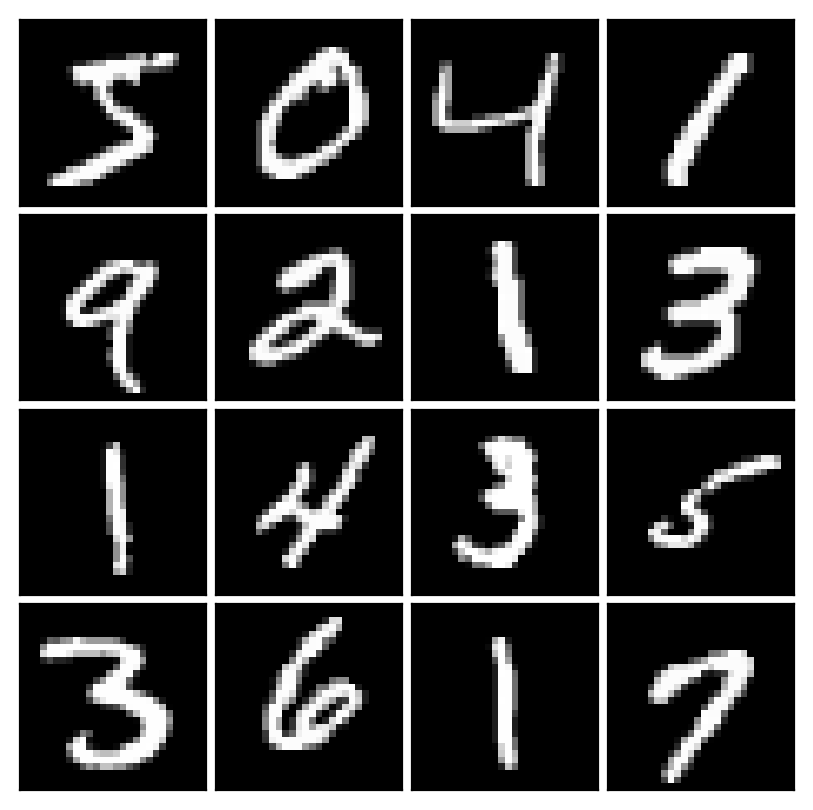

In [6]:
def plot_digits(im):
  plt.figure(figsize=(5, 5))
  grid = gridspec.GridSpec(4, 4, wspace=0.05, hspace=0.05)
  for i, g in enumerate(grid):
    ax = plt.subplot(g)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(im[i,:,:,0], cmap='gray')

plot_digits(images[:16])

# GAN 구현

- GAN은 다음과 같이 두개의 코드로 구성된다

- 생성자
 - 랜덤 신호를 입력으로 받고, 훈련 데이터에 있는 MNIST를 닮은 출력을 생성한다
- 판별자
 - 생성자가 만든 (가짜) 출력 이미지와 (실제) 훈련 이미지를 입력으로 받아 가짜 이미지와 실제 이미지를 구분하는 작업을 수행한다

- Wasserstein GAN (WGAN)을 사용
- 생성자는 Dense망을 사용하여 입력 노이지를 7x7 크기의 이미지로 바꾸며 8개의 채널을 사용한다
 - 두 번의 컨볼류션 계층을 수행하며 각각 업샘플링을 하여 14x14 그리고 28x28 크기의 이미지로 변형한다

- 판별자는 위의 작업의 역순의 작업을 수행한다
 - 두 번의 컨볼류션 계층을 수행하며 각각 1/2 다운 샘플링을 하여 14x14 그리고 7x7 크기의 피처맵을 만든다
 - 이후 전결합망(dense)을 통과하여 단일값을 갖는 출력을 생성한다
- WGAN에서는 softmax 대신 softplus 활성함수를 사용하여 (0~1) 사이의 값이 아닌, 임의의 크기를 갖는 값을 출력한다
 - (분류) 확률을 얻는 것이 아니라 거리(distance)를 예측한다
 - WGAN에서는 실제 이미지일 확률을 예측하는 것이 아니라, 훈련 이미지의 분포와 생성 이미지의 분포 사이의 "거리"를 나타낸다
 - 이 거리 값을 생성자를 훈련시키는데 손실함수로 사용하여 학습 속도를 개선했다

## GAN 클래스 정의

In [7]:
class DigitGAN(dc.models.WGAN):

  def get_noise_input_shape(self):
    return (10,)

  def get_data_input_shapes(self):
    return [(28, 28, 1)]

  def create_generator(self):
    return tf.keras.Sequential([
        Dense(7*7*8, activation=tf.nn.relu),
        Reshape((7, 7, 8)),
        Conv2DTranspose(filters=16, kernel_size=5, strides=2, activation=tf.nn.relu, padding='same'),
        Conv2DTranspose(filters=1, kernel_size=5, strides=2, activation=tf.sigmoid, padding='same')
    ])

  # softplus 사용
  def create_discriminator(self):
    return tf.keras.Sequential([
        Conv2D(filters=32, kernel_size=5, strides=2, activation=tf.nn.leaky_relu, padding='same'),
        Conv2D(filters=64, kernel_size=5, strides=2, activation=tf.nn.leaky_relu, padding='same'),
        Dense(1, activation=tf.math.softplus)
    ])

gan = DigitGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000), model_dir = 'gan')

# 모델 학습

- 이미지 생성자는 dataset에서 데이터를 가지고 오며 epoch는 100으로 설정했다

- 일반적인 GAN을 구현할 때는 생성자와 판별자를 훈련시키는데 서로 너무 큰 실력 차이가 나지 않도록 세심하게 주의를 해야 한다
- 실력(성능)의 차이가 너무 크면 균형있게 두개의 모델을 학습시키기가 어렵기 때문이다

- WGAN에서는 이러한 문제를 피할 수 있는데, 판별자의 성능이 좋아지면 이에 비례한 손실함수(거리)를 알려주고 이를 통해 생성자가 학습을 더 잘 할 수 있게 한다
- `generator_steps=0.2`로 설정하였다. 이는 판별자가 5회 학습하면 생성자가 1회 학습하는 비율인데, 이렇게 하여 학습 속도를 높이고 더 나은 성능을 얻도록 한다

## softmax와 softplus

(-0.1, 3.0)

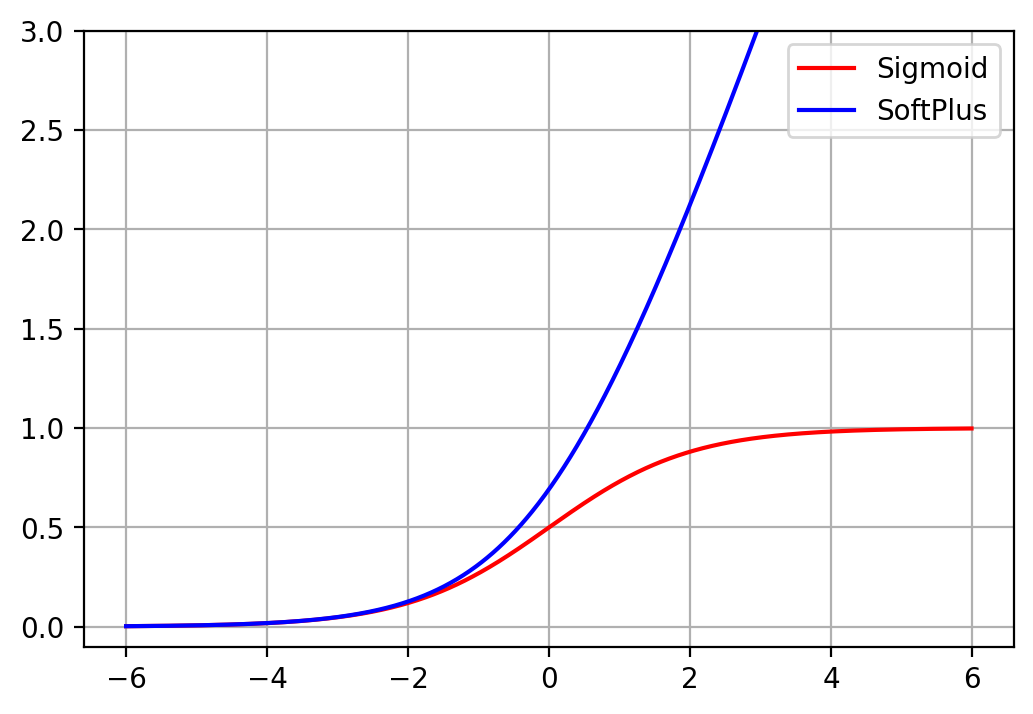

In [8]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

x = np.arange(-6, 6, 0.01)

def sigmoid(x): # 시그모이드(Sigmoid, S-커브), Logistic Regression
    return 1 / (1 + np.exp(-x))
ax.plot(x, sigmoid(x), color='r', linestyle='-', label="Sigmoid")

def softplus_func(x): # SoftPlus 함수
    return np.log( 1 + np.exp(x) )
ax.plot(x, softplus_func(x), color='b', linestyle='-', label="SoftPlus")

ax.grid()
ax.legend()
plt.ylim(-0.1, 3)

## 데이터 읽기

- 배치단위로 읽는다
- iterbatches() 함수 사용

In [9]:
def iterbatches(epochs):
  for i in range(epochs):
    for batch in dataset.iterbatches(batch_size=gan.batch_size):
      yield {gan.data_inputs[0]: batch[0]}

In [10]:
gan.fit_gan(iterbatches(100), generator_steps=0.2, checkpoint_interval=5000)

Ending global_step 4999: generator average loss 0.473027, discriminator average loss -0.025041
Ending global_step 9999: generator average loss 0.549777, discriminator average loss -0.00612653
Ending global_step 14999: generator average loss 0.528609, discriminator average loss -0.00548018
Ending global_step 19999: generator average loss 0.513314, discriminator average loss -0.00751862
Ending global_step 24999: generator average loss 0.511697, discriminator average loss -0.0073
Ending global_step 29999: generator average loss 0.517258, discriminator average loss -0.00703094
Ending global_step 34999: generator average loss 0.53489, discriminator average loss -0.00620261
Ending global_step 39999: generator average loss 0.520797, discriminator average loss -0.00376007
Ending global_step 44999: generator average loss 0.51382, discriminator average loss -0.00558094
Ending global_step 49999: generator average loss 0.48399, discriminator average loss -0.00525434
Ending global_step 54999: gener

## 백업된 모델 사용하기
- 구글 드라이브에 모델을 백업한 경우

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# gan = DigitGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000),
#                model_dir = '/content/drive/MyDrive/gan')
# gan.restore()

## 이미지 생성 결과 보기

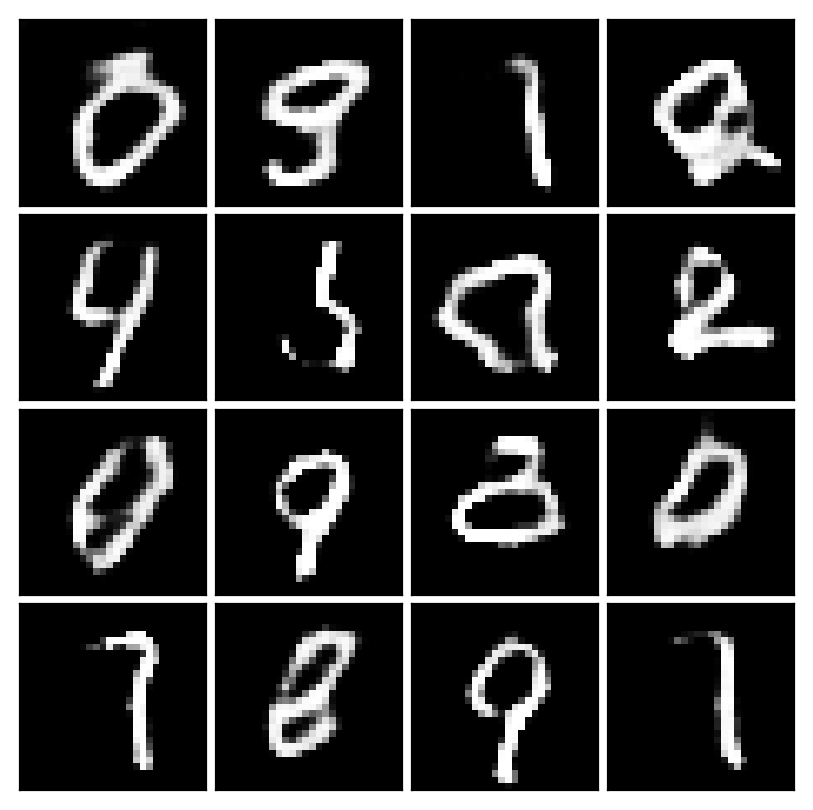

In [22]:
plot_digits(gan.predict_gan_generator(batch_size=100))